In [42]:
import pandas as pd
import numpy as np

In [43]:
areas = pd.read_csv('data/state-areas.csv')
pop = pd.read_csv('data/state-population.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [44]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [45]:
abbrevs.shape

(51, 2)

In [46]:
abbrevs= abbrevs.append({'state':'Puerto Rico',
                         'abbreviation':'PR'}, ignore_index=True)

/tmp/ipykernel_44617/2362556288.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  abbrevs= abbrevs.append({'state':'Puerto Rico',


In [47]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [48]:
pop.shape

(2544, 4)

In [49]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [50]:
areas.shape

(52, 2)

In [51]:
pop['state/region'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'USA'],
      dtype=object)

In [52]:
pop.columns

Index(['state/region', 'ages', 'year', 'population'], dtype='object')

In [53]:
abbrevs.columns

Index(['state', 'abbreviation'], dtype='object')

In [54]:
# Task 1 - to rank the us states and territories by 2012 population density

merged = pd.merge(pop,abbrevs,how='outer',left_on='state/region',right_on='abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [55]:
merged.drop('abbreviation',axis=1,inplace=True)
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


In [56]:
# Now we verify if there are any mismatcches which we can check by looking for records with null values
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           48
dtype: int64

In [57]:
merged[merged['population'].isnull()]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,Puerto Rico
2449,PR,total,1990,NaN,Puerto Rico
2450,PR,total,1991,NaN,Puerto Rico
2451,PR,under18,1991,NaN,Puerto Rico
2452,PR,total,1993,NaN,Puerto Rico
2453,PR,under18,1993,NaN,Puerto Rico
2454,PR,under18,1992,NaN,Puerto Rico
2455,PR,total,1992,NaN,Puerto Rico
2456,PR,under18,1994,NaN,Puerto Rico
2457,PR,total,1994,NaN,Puerto Rico


In [58]:
# Insight -  all missing population values are from Puerto Rico prior to the year 2000
# and likely cause of unavialability of the data from the source 

In [59]:
merged[merged['state'].isnull()]

,state/region,ages,year,population,state
2496,USA,under18,1990,64218512.0,NaN
2497,USA,total,1990,249622814.0,NaN
2498,USA,total,1991,252980942.0,NaN
2499,USA,under18,1991,65313018.0,NaN
2500,USA,under18,1992,66509177.0,NaN
2501,USA,total,1992,256514231.0,NaN
2502,USA,total,1993,259918595.0,NaN
2503,USA,under18,1993,67594938.0,NaN
2504,USA,under18,1994,68640936.0,NaN
2505,USA,total,1994,263125826.0,NaN


In [60]:
# since everything in state is a full name, we can addd 'United States of Americaa'

merged.loc[merged['state/region']=='USA','state']='United States of America'

In [61]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [62]:
# now lets merge this dataframe with the area dataframe

final = pd.merge(merged,areas,on='state',how='left')
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States of America,NaN
2540,USA,under18,2011,73902222.0,United States of America,NaN
2541,USA,total,2011,311582564.0,United States of America,NaN
2542,USA,under18,2012,73708179.0,United States of America,NaN


In [63]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [64]:
# finding the state mapped to the area which contains the null values

final['state'][final['area (sq. mi)'].isnull()].unique() 

array(['United States of America'], dtype=object)

In [65]:
# Sum of nuique state areas should be the area of the USA
# Basically handling the missing values

uni=final['area (sq. mi)'].unique()[:-1]
# uni.sum()
final['area (sq. mi)'].fillna(uni.sum(),inplace=True)
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)    False
dtype: bool

In [66]:
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States of America,3790399.0
2540,USA,under18,2011,73902222.0,United States of America,3790399.0
2541,USA,total,2011,311582564.0,United States of America,3790399.0
2542,USA,under18,2012,73708179.0,United States of America,3790399.0


In [68]:
# Task 1 - to rank the us states and territories by 2012 population density
# selecting required data
data_2010 = final.query("year==2010 & ages =='total'")
# data_2010

In [69]:
data_2010.set_index('state',inplace=True)
data_2010

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0
Colorado,CO,total,2010,5048196.0,104100.0
Connecticut,CT,total,2010,3579210.0,5544.0
Delaware,DE,total,2010,899711.0,1954.0
District of Columbia,DC,total,2010,605125.0,68.0


In [70]:
data_2010['population density'] = data_2010['population']/data_2010['area (sq. mi)']

/tmp/ipykernel_44617/1621304869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010['population density'] = data_2010['population']/data_2010['area (sq. mi)']


In [71]:
data_2010.sort_values('population density', ascending=False)

,state/region,ages,year,population,area (sq. mi),population density
state,,,,,,
District of Columbia,DC,total,2010,605125.0,68.0,8898.897059
Puerto Rico,PR,total,2010,3721208.0,3515.0,1058.665149
New Jersey,NJ,total,2010,8802707.0,8722.0,1009.253268
Rhode Island,RI,total,2010,1052669.0,1545.0,681.339159
Connecticut,CT,total,2010,3579210.0,5544.0,645.600649
Massachusetts,MA,total,2010,6563263.0,10555.0,621.815538
Maryland,MD,total,2010,5787193.0,12407.0,466.445797
Delaware,DE,total,2010,899711.0,1954.0,460.445752
New York,NY,total,2010,19398228.0,54475.0,356.094135


In [ ]:
# Inference: Based on the insigt, DC has the highest pop dens and alaska has the lowest

In [75]:
# State with most number of minors i.e least than 18 in 2012

final.query('ages=="under18" & year==2012').sort_values('population', ascending=False)

,state/region,ages,year,population,state,area (sq. mi)
2542,USA,under18,2012,73708179.0,United States of America,3790399.0
192,CA,under18,2012,9209007.0,California,163707.0
2110,TX,under18,2012,6985807.0,Texas,268601.0
1537,NY,under18,2012,4264694.0,New York,54475.0
478,FL,under18,2012,4012421.0,Florida,65758.0
670,IL,under18,2012,3057042.0,Illinois,57918.0
1825,PA,under18,2012,2737905.0,Pennsylvania,46058.0
1726,OH,under18,2012,2668125.0,Ohio,44828.0
481,GA,under18,2012,2487831.0,Georgia,59441.0
1630,NC,under18,2012,2284122.0,North Carolina,53821.0


In [77]:
# Example 2
# All number of people born data from the CDC
df = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
df.shape

(15547, 5)

In [78]:
df.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [80]:
df['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [81]:
# Lets create a new columns containing respective decades

df['decade']=10*(df['year']//10)
df

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [82]:
df['decade'].unique()

array([1960, 1970, 1980, 1990, 2000])

In [87]:
# finding out the sum of male and female births across the decades
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df.pivot_table(values='births',index='decade',columns='gender',aggfunc='sum')


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

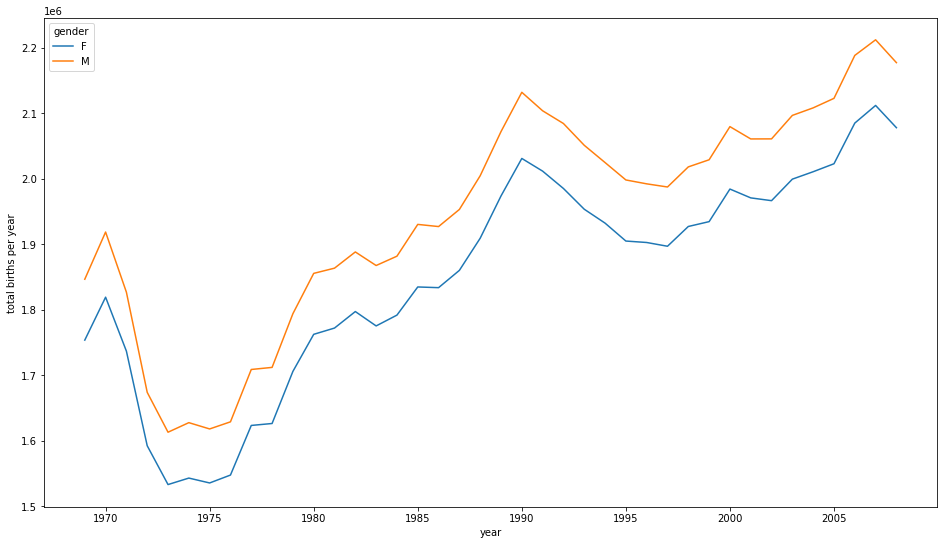

In [98]:
plt.rcParams['figure.figsize']=(16,9)
df.pivot_table(values='births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

In [95]:
df.isnull().any()

year      False
month     False
day        True
gender    False
births    False
decade    False
dtype: bool

In [96]:
df['day'].isnull().sum()

480

In [100]:
# technique to handle the missing values by splitting the data into quartiles and computiong the IQR

quartiles = np.percentile(df['births'],[25,50,70])
quartiles

array([4358., 4814., 5196.])

In [104]:
x = quartiles[0]
y = quartiles[2]
z = (quartiles[2]-quartiles[0])


In [105]:
births = df.query("(births>@x-1.5*@z) & (births<@y+1.5*@z)") # removing outliers
births


,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [107]:
births.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

In [108]:
births.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
decade      int64
dtype: object

In [110]:
births['day']=births['day'].astype(int)

/tmp/ipykernel_44617/3805690895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day']=births['day'].astype(int)


In [113]:
births.index=pd.to_datetime(10000*births['year']+100*births['month']+births['day'],format='%Y%m%d')
# create new values 
births['datofweek']=births.index.dayofweek

/tmp/ipykernel_44617/1380789663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['datofweek']=births.index.dayofweek


In [114]:
births

,year,month,day,gender,births,decade,datofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


/tmp/ipykernel_44617/2077366513.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])


Text(0, 0.5, 'mean births by day')

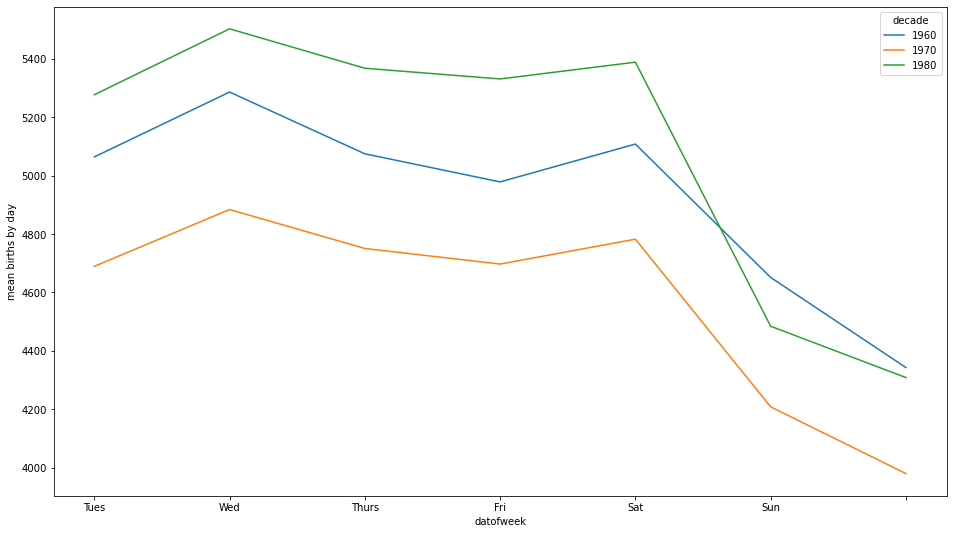

In [119]:
# lets plot yhe births by weekday for several decades

births.pivot_table('births',index='datofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day')

In [ ]:
# Apparantly birhts are slightly less common on the weekends than on weekday

In [120]:
# Another plot to view the mean number of births by the day of the year - To Do this we need to group month and day seperately

births_by_date = births.pivot_table('births',[births.index.month,births.index.day])

births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [123]:
# The above index is a multiindex over months and days. so we will turn 
# these months and days into a date by associating them with a dummy variable

from curses import delay_output


births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

/tmp/ipykernel_44617/1529149315.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]


In [124]:
births_by_date

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


<AxesSubplot:>

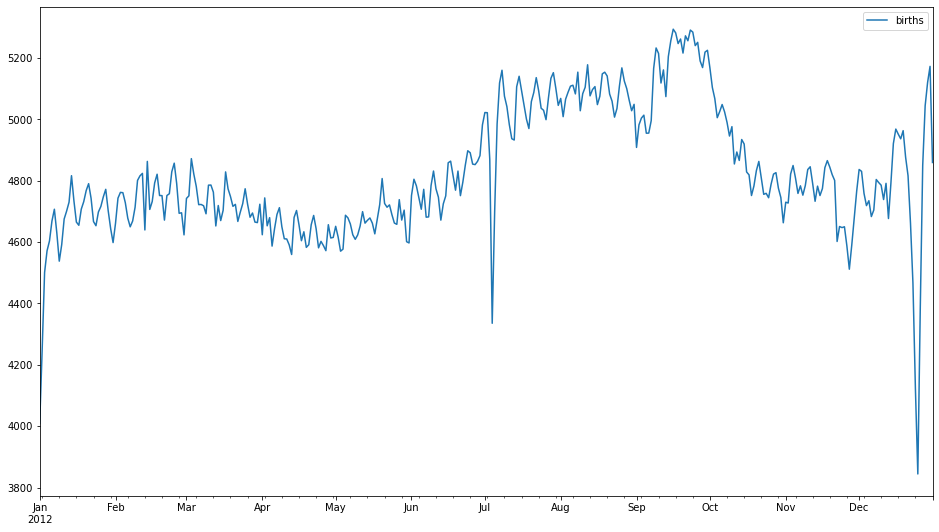

In [126]:
fig,ax=plt.subplots(figsize=(16,9))
births_by_date.plot(ax=ax)

In [ ]:
# The plot depicts average daily births by date. 
# and also higher number of birhts bw Sept-Oct